Importing the required library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from itertools import groupby
from operator import itemgetter
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# reading data set
data = pd.read_csv("MultiStat_project_full.csv")
data.head()

,Unnamed: 0,country,year,cpi,dyn_gdp,dyn_gdp_china,dyn_GDP_US,interest_rate_US,oil_yoy,dyn_consum,dyn_fx_rate,diff_priv_credit_gdp,net_lending,public_debt,interest_on_debt,overvaluation,ca_balance,dyn_fix_cap_form,dyn_export_share,diff_unempl,dyn_prod_dol,VIX,GDP_per_cap,developed,crisis_next_year,crisis_next_period,crisis_first_year
0,Albania.Albania.28,Albania,1997,33.18,-10.84,9.23,4.49,6.35,-9.70,-7.52,42.52,0.66,-11.90,72.19,7.59,-76.14,-13.05,-3.19,-40.09,2.60,-12.62,24.34,4.21,0,1,0,0
1,Albania.Albania.29,Albania,1998,20.64,9.01,7.84,4.45,5.26,-34.42,-9.04,1.14,-0.10,-9.93,71.18,12.73,-75.09,-6.94,21.27,29.08,2.80,8.12,25.38,4.62,0,0,1,0
2,Albania.Albania.30,Albania,1999,0.39,13.50,7.67,4.69,5.64,38.27,-11.17,-8.59,0.22,-8.84,68.18,11.31,-72.59,-1.95,26.00,77.49,0.70,13.50,24.36,5.28,0,1,0,0
3,Albania.Albania.31,Albania,2000,0.05,6.67,8.49,4.09,6.03,53.41,-8.95,4.37,0.78,-7.77,63.77,9.25,-72.88,-7.07,53.12,8.20,-1.60,5.31,27.93,5.67,0,0,0,0
4,Albania.Albania.32,Albania,2001,3.11,7.94,8.34,0.98,5.02,-16.59,-12.03,-0.16,1.25,-6.84,60.61,6.92,-72.43,-6.32,34.82,18.93,-0.36,7.84,23.78,6.18,0,0,0,0


Description of Variables

|Variable|Description|
|---------------|-----------------|
|cpi|Consumer Price index - inflation|
|dyn_gdp|GDP dynamics|
|dyn_gdp_china|China GDP dynamics|
|dyn_GDP_US|US GDP dynamics|
|interest_rate_US|US interest rates|
|oil_yoy|Oil price dynamics|
|dyn_consum|Consumption dynamics|
|dyn_fx_rate|FX rate dynamics|
|diff_priv_credit_gdp|Credit to GDP change|
|net_lending|Net lending|
|public_debt|Public debt|
|interest_on_debt|Interest on debt| 
|overvaluation|Currency overvaluation|
|ca_balance|Current account balance| 
|dyn_fix_cap_form|Fixed capital formation dynamics| 
|dyn_export_share|Export share dynamics| 
|diff_unempl|Unemployment change| 
|dyn_prod_dol|Labor productivity dynamics| 
|VIX|Chicago Board Options Exchange Volatility Index| 
|GDP_per_cap|GDP per capita|


In [3]:
# Counting the number of crisis next year index by year and country 
data.groupby(['year', 'country'], as_index = False)[['crisis_next_year']].sum()

,year,country,crisis_next_year
0,1992,Algeria,1
1,1992,Belgium,0
2,1992,Chile,0
3,1992,Denmark,0
4,1992,El Salvador,1
...,...,...,...
982,2016,Sweden,0
983,2016,Switzerland,0
984,2016,Tunisia,1
985,2016,Ukraine,1


In [4]:
# grouping data set by developed and developing countries for crisis event number calculation
data.groupby(['year', 'developed'], as_index = False)[['crisis_next_year']].sum()

,year,developed,crisis_next_year
0,1992,0,2
1,1992,1,1
2,1993,0,4
3,1993,1,1
4,1994,0,4
5,1994,1,1
6,1995,0,4
7,1995,1,0
8,1996,0,1
9,1996,1,0


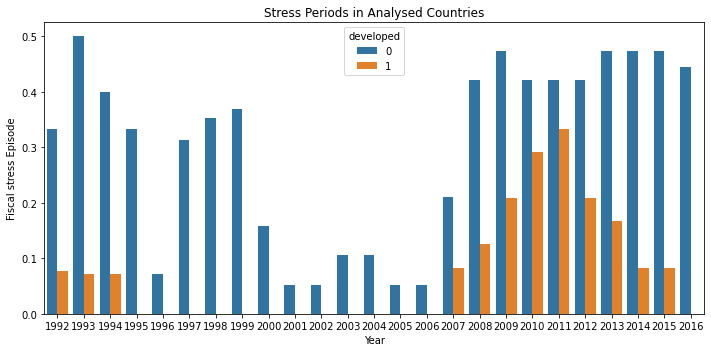

In [5]:
# bar plot for incidence of stress periods between 1992 to 2016 for developed and developing countries 
# 0 for developing countries and 1 for developed countries 
plt.figure(figsize = (10,5))
sns.barplot(x = 'year', y = 'crisis_next_year', hue = 'developed', data = data, ci = None)
plt.title('Stress Periods in Analysed Countries')
plt.xlabel('Year')
plt.ylabel('Fiscal stress Episode')
plt.tight_layout()
plt.savefig('plots\stress_periods.png', dpi=350)

Stress periods are not equally distributed across time and country groups (Figure 1). 

The majority of them, 123, were in developing countries (29% of observations for developing countries). Among observations for advanced countries only 7% were stress periods. In particular, most of the stress periods in advanced countries are related to the fiscal stress in the euro area which started around 2010-2011.

Comparison of the means for observations 2 years before the stress event, and those for 2 years before a tranquil period confirms the intuition that variables tend to behave in a particular way in the period preceding the occurrence of the stress event. 

The Wilcoxon test with statistical significance at 0.05% is employed to check whether the means are statistically different in subgroups. 

The Wilcoxon test is a non-parametric alternative to a standard t-student test and can be used to compare two unpaired groups with non-normal distributions. In general, the differences in means before the stress period and before the tranquil period are statistically significantly different and in line with intuition in most of the cases,

In [6]:
# Wilcoxon test to test difference in covariates for countries 2 years before stress period and 2 year before tranquil period 
# Dataset is small, hence non-parametric test - no assumption on distribution 

# list of countries in the dataset
country_lst = data.country.drop_duplicates()
len(country_lst)

# get index of all the +2 and -2 neighbors of the stress years 
def get_index_before_after_stress_yr():
    for country in country_lst:

        index_country_stress = data.loc[(data.country == country) & (data['crisis_next_year'] == 1)].index.tolist()
        country_index = data.loc[data.country == country].index.tolist()

        ranges =[]

        for k,g in groupby(enumerate(index_country_stress),lambda x:x[0]-x[1]):
            group = (map(itemgetter(1),g))
            group = list(map(int,group))
            if len(group) > 1:
                ranges.append([group[0],group[-1]])
            else:
                ranges.append(group[0])

        # get +2 and -2 yrs index of the yrs of crisis

        for i in ranges:
            if type(i) == int:
                local_boundary_bef = [j if j in country_index else np.nan for j in list(range(i-1,i+1)) + list(range(i+2,i+4))]

            elif type(i) == list:
                local_boundary_bef = [j if j in country_index else np.nan for j in list(range(i[0]-1, i[0]+1)) + list(range(i[1]+2,i[1]+4))]
            
            yield {
                "before 2 yr": local_boundary_bef[0],
                "before 1 yr": local_boundary_bef[1],
                "after 1 yr": local_boundary_bef[2],
                "after 2 yr": local_boundary_bef[3],
            }
            
            
A = get_index_before_after_stress_yr()

In [7]:
# get all the indexes in one dataframe
neigh_stress_yrs = pd.DataFrame(A)

# seperate the indexes into first and second lag year
# this is done so thant when we dropna we can preserve as many datapoints as possible
stress_1 = neigh_stress_yrs[["before 1 yr", "after 1 yr"]].dropna()
stress_2 = neigh_stress_yrs[["before 2 yr", "after 2 yr"]].dropna()

Wilcoxon test for 1 yr before and after stress periods

In [8]:
# declaring all covariates for ease
variables = ['cpi', 'dyn_gdp', 'dyn_gdp_china',
       'dyn_GDP_US', 'interest_rate_US', 'oil_yoy', 'dyn_consum',
       'dyn_fx_rate', 'diff_priv_credit_gdp', 'net_lending', 'public_debt',
       'interest_on_debt', 'overvaluation', 'ca_balance', 'dyn_fix_cap_form',
       'dyn_export_share', 'diff_unempl', 'dyn_prod_dol', 'VIX', 'GDP_per_cap']

In [9]:
# function to the test statistic for each variable 
def wilcoxon_test(variables, period, df):
    for var in variables:
        x = data[[var]].iloc[df[f"before {period} yr"],:]
        # resetting index for use in fn
        x.index = [i for i in range(0, len(x))]

        y = data[[var]].iloc[df[f"after {period} yr"],:]
        # resetting index for use in fn
        y.index = [i for i in range(0, len(y))]
        
        yield{
            f"Wilcoxon p values {period}": sts.wilcoxon(x[var], y = y[var])[1],
            f"Variable {period}": var
        }

In [10]:
# Generate Wilcoxon estimates
wil_1 = pd.DataFrame(wilcoxon_test(variables, 1, stress_1))
wil_2 = pd.DataFrame(wilcoxon_test(variables, 2, stress_2))

C:\Users\pavan\anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [11]:
# concatenate the two dataframes
wilcoxon = pd.concat([wil_1, wil_2], axis= 1)
# rearranging columns
wilcoxon = wilcoxon[["Variable 1", "Wilcoxon p values 1", "Wilcoxon p values 2"]]
# print(wilcoxon.to_latex())
wilcoxon

,Variable 1,Wilcoxon p values 1,Wilcoxon p values 2
0,cpi,0.00,0.02
1,dyn_gdp,0.57,0.42
2,dyn_gdp_china,0.00,0.00
3,dyn_GDP_US,0.84,0.50
4,interest_rate_US,0.00,0.00
5,oil_yoy,0.30,0.00
6,dyn_consum,0.11,0.48
7,dyn_fx_rate,0.91,0.52
8,diff_priv_credit_gdp,0.22,0.03
9,net_lending,0.45,0.26


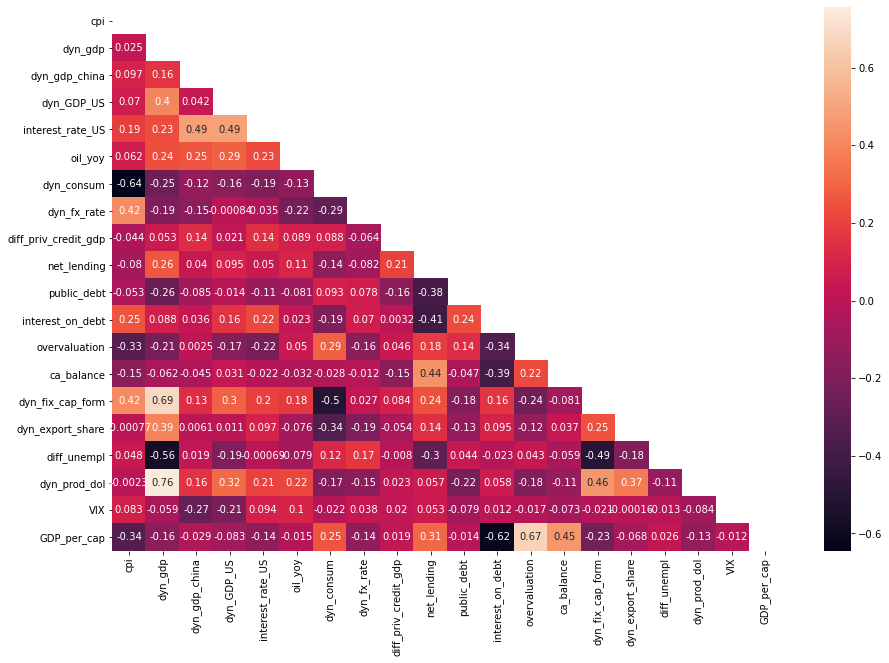

In [12]:
# pairwise correlation heatmap
plt.figure(figsize = (15, 10))
data_pair = data[['cpi', 'dyn_gdp', 'dyn_gdp_china', 'dyn_GDP_US', 'interest_rate_US', 'oil_yoy', 'dyn_consum', 'dyn_fx_rate', 'diff_priv_credit_gdp', 'net_lending', 'public_debt', 'interest_on_debt', 'overvaluation', 'ca_balance', 'dyn_fix_cap_form', 'dyn_export_share', 'diff_unempl', 'dyn_prod_dol', 'VIX', 'GDP_per_cap']]
Var_Corr = data_pair.corr()
matrix = np.triu(Var_Corr)
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, mask = matrix)
# plt.tight_layout()
plt.savefig('plots\heat.png', dpi=350)

Correlations higher than 65% are present in the following cases: 

1. dynamics of labour productivity and of GDP (76%)
2. dynamics of fixed capital formation and of GDP (69%)
3. currency overvaluation and GDP per capita (67%)

High pairwise correlation is a problem for econometric models, which means that such variables should not be included together in the specification of the logit model.

In [13]:
# Logit lasso 
X = data[['cpi', 'dyn_gdp', 'dyn_gdp_china', 'dyn_GDP_US', 'interest_rate_US', 
          'oil_yoy', 'dyn_consum', 'dyn_fx_rate', 'diff_priv_credit_gdp', 
          'net_lending', 'public_debt', 'interest_on_debt', 'overvaluation', 
          'ca_balance', 'dyn_fix_cap_form', 'dyn_export_share', 'diff_unempl', 
          'dyn_prod_dol', 'VIX', 'GDP_per_cap']]
y = data['crisis_next_year']

In [14]:
# Lasso Linear 
from sklearn import linear_model
clf = linear_model.Lasso(alpha = 0.1)
res = clf.fit(X, y)
clf.coef_

array([ 0.00552762, -0.00850654, -0.        , -0.        , -0.00318268,
       -0.00036713, -0.00616093,  0.00147109, -0.00182657, -0.        ,
        0.00108934, -0.        ,  0.0001361 , -0.00645857, -0.0016078 ,
       -0.        ,  0.        , -0.        , -0.        , -0.00386632])

Covariates (whose value is 0) will be discarded in logit model based upon alpha value

In [15]:
from sklearn.model_selection import cross_val_score

# defining a generic Function to give ROC_AUC Scores in table format for better readability
def crossvalscore(model):
    scores = cross_val_score(model,X,y,cv=5,scoring='roc_auc',n_jobs=-1)
    acc = cross_val_score(model,X,y,cv=5,scoring='accuracy',n_jobs=-1)
    rand_scores = pd.DataFrame({
                                 'cv':range(1,6),
                                 'roc_auc score':scores,
                                 'accuracy score':acc
    })
    print('AUC :',rand_scores['roc_auc score'].mean())
    print('accuracy :',rand_scores['accuracy score'].mean())
    return rand_scores.sort_values(by='roc_auc score',ascending=False)

In [16]:
# Lasso Logit 
log_clf = LogisticRegression(C = 0.1, 
                              class_weight= 'balanced', 
                              penalty= 'l1', 
                              solver= 'liblinear',
                              random_state=42
)
crossvalscore(log_clf)

AUC : 0.8312013706913929
accuracy : 0.7405168435625289


,cv,roc_auc score,accuracy score
4,5,0.91,0.76
1,2,0.88,0.83
3,4,0.83,0.66
2,3,0.79,0.70
0,1,0.74,0.76


In [17]:
log_clf = LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)
scores = cross_val_score(log_clf,X,y,cv=5,scoring='roc_auc',n_jobs=-1)
acc = cross_val_score(log_clf,X,y,cv=5,scoring='accuracy',n_jobs=-1)
rand_scores = pd.DataFrame({
                              'cv':range(1,6),
                              'roc_auc score':scores,
                              'accuracy score':acc
                              })
print('AUC :',rand_scores['roc_auc score'].mean())
print('accuracy :',rand_scores['accuracy score'].mean())
rand_scores.sort_values(by='roc_auc score',ascending=False)

AUC : 0.8312013706913929
accuracy : 0.7405168435625289


,cv,roc_auc score,accuracy score
4,5,0.91,0.76
1,2,0.88,0.83
3,4,0.83,0.66
2,3,0.79,0.70
0,1,0.74,0.76


In [18]:
# dropping variables with zero coefficient for lasso - logit fit
import statsmodels.formula.api as smf
model = 'crisis_next_year ~ cpi + dyn_gdp + interest_rate_US + oil_yoy + dyn_consum + dyn_fx_rate + diff_priv_credit_gdp + public_debt + interest_on_debt + overvaluation + ca_balance + dyn_fix_cap_form + dyn_export_share  + GDP_per_cap'
logit = smf.logit(formula=model, data=data).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.308612
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       crisis_next_year   No. Observations:                  987
Model:                          Logit   Df Residuals:                      972
Method:                           MLE   Df Model:                           14
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.3163
Time:                        15:54:46   Log-Likelihood:                -304.60
converged:                       True   LL-Null:                       -445.51
Covariance Type:            nonrobust   LLR p-value:                 7.235e-52
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.8654      0.695      2.686      0.007       0.504       3.227

In [19]:
## List to store coefficients
lasso_coef = list()

for loop_number in range(0, 100):
    
    # Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
    
    ## Estimate lambda using cv
    lasso_cv = LassoCV(normalize = True, cv = 20).fit(X_train, Y_train)
    
    ## Building LASSO model
    lasso_md = Lasso(alpha = lasso_cv.alpha_, normalize = True).fit(X_train, Y_train)
    
    lasso_coef.append(lasso_md.coef_)
    lasso_coef_df = pd.DataFrame(lasso_coef, columns = X.columns)
    lasso_coef_df['total_loops'] = loop_number + 1
    
lasso_coef_df.head()

,cpi,dyn_gdp,dyn_gdp_china,dyn_GDP_US,interest_rate_US,oil_yoy,dyn_consum,dyn_fx_rate,diff_priv_credit_gdp,net_lending,public_debt,interest_on_debt,overvaluation,ca_balance,dyn_fix_cap_form,dyn_export_share,diff_unempl,dyn_prod_dol,VIX,GDP_per_cap,total_loops
0,0.01,-0.01,0.00,0.00,-0.04,-0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,0.00,0.03,-0.01,-0.00,-0.00,100
1,0.01,-0.00,0.00,0.00,-0.05,-0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.02,-0.00,-0.00,-0.00,100
2,0.00,-0.01,0.00,-0.00,-0.05,-0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.03,-0.00,0.00,-0.00,100
3,0.01,-0.00,0.00,0.00,-0.05,-0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,0.00,0.03,-0.01,0.00,-0.00,100
4,0.01,-0.01,-0.00,-0.00,-0.05,-0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.00,0.00,0.03,-0.00,0.00,-0.00,100


In [58]:
lasso_cv.alpha_

0.0002682065708854882

In [20]:
X.shape

(987, 20)

In [38]:
# for 100 loops for dimension reduction and discarding coefficient whose value reduced to zero in Lasso 70/ 100 loops
dim_red = (lasso_coef_df == 0).sum()
# for latex output
dim_red_df = pd.DataFrame(dim_red, columns = ["times coefficient = 0"])
dim_red_df

,times coefficient = 0
cpi,0
dyn_gdp,3
dyn_gdp_china,62
dyn_GDP_US,86
interest_rate_US,0
oil_yoy,73
dyn_consum,0
dyn_fx_rate,4
diff_priv_credit_gdp,5
net_lending,27


In [ ]:
X.head()

,cpi,dyn_gdp,dyn_gdp_china,dyn_GDP_US,interest_rate_US,oil_yoy,dyn_consum,dyn_fx_rate,diff_priv_credit_gdp,net_lending,public_debt,interest_on_debt,overvaluation,ca_balance,dyn_fix_cap_form,dyn_export_share,diff_unempl,dyn_prod_dol,VIX,GDP_per_cap
0,33.18,-10.84,9.23,4.49,6.35,-9.70,-7.52,42.52,0.66,-11.90,72.19,7.59,-76.14,-13.05,-3.19,-40.09,2.60,-12.62,24.34,4.21
1,20.64,9.01,7.84,4.45,5.26,-34.42,-9.04,1.14,-0.10,-9.93,71.18,12.73,-75.09,-6.94,21.27,29.08,2.80,8.12,25.38,4.62
2,0.39,13.50,7.67,4.69,5.64,38.27,-11.17,-8.59,0.22,-8.84,68.18,11.31,-72.59,-1.95,26.00,77.49,0.70,13.50,24.36,5.28
3,0.05,6.67,8.49,4.09,6.03,53.41,-8.95,4.37,0.78,-7.77,63.77,9.25,-72.88,-7.07,53.12,8.20,-1.60,5.31,27.93,5.67
4,3.11,7.94,8.34,0.98,5.02,-16.59,-12.03,-0.16,1.25,-6.84,60.61,6.92,-72.43,-6.32,34.82,18.93,-0.36,7.84,23.78,6.18


In [ ]:
# discarding co-variates after LASSO 
X_lasso = X[[
          'cpi', 'dyn_gdp', 'interest_rate_US', 
          'dyn_consum', 'dyn_fx_rate', 'diff_priv_credit_gdp', 
          'net_lending', 'public_debt', 'interest_on_debt', 
          'ca_balance', 'diff_unempl', 
          'dyn_prod_dol', 'GDP_per_cap'
]]
X_lasso.head()

,cpi,dyn_gdp,interest_rate_US,dyn_consum,dyn_fx_rate,diff_priv_credit_gdp,net_lending,public_debt,interest_on_debt,ca_balance,diff_unempl,dyn_prod_dol,GDP_per_cap
0,33.18,-10.84,6.35,-7.52,42.52,0.66,-11.90,72.19,7.59,-13.05,2.60,-12.62,4.21
1,20.64,9.01,5.26,-9.04,1.14,-0.10,-9.93,71.18,12.73,-6.94,2.80,8.12,4.62
2,0.39,13.50,5.64,-11.17,-8.59,0.22,-8.84,68.18,11.31,-1.95,0.70,13.50,5.28
3,0.05,6.67,6.03,-8.95,4.37,0.78,-7.77,63.77,9.25,-7.07,-1.60,5.31,5.67
4,3.11,7.94,5.02,-12.03,-0.16,1.25,-6.84,60.61,6.92,-6.32,-0.36,7.84,6.18


In [43]:
full_var_form = ""
for var in X.columns:
    full_var_form += f"{var} +"
full_var_form[:-1]
# full_spec_model = sm.Log

'cpi +dyn_gdp +dyn_gdp_china +dyn_GDP_US +interest_rate_US +oil_yoy +dyn_consum +dyn_fx_rate +diff_priv_credit_gdp +net_lending +public_debt +interest_on_debt +overvaluation +ca_balance +dyn_fix_cap_form +dyn_export_share +diff_unempl +dyn_prod_dol +VIX +GDP_per_cap '

In [61]:
import statsmodels.formula.api as smf
model_full_spec = "crisis_next_year ~" + full_var_form[:-1] 
logit_full_spec = smf.logit(formula=model_full_spec + "+ C(country)", data=data).fit(cov_type = "HAC", cov_kwds = {'maxlags': 2})

         Current function value: 0.214368
         Iterations: 35


C:\Users\pavan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [68]:
# dropping variables with zero coefficient for lasso - logit fit
model = 'crisis_next_year ~  cpi + dyn_gdp + interest_rate_US + dyn_consum + dyn_fx_rate + diff_priv_credit_gdp + net_lending + public_debt + interest_on_debt + ca_balance + diff_unempl + dyn_prod_dol + GDP_per_cap '
logit = smf.logit(formula=model + "+ C(country)", data=data).fit(method = "bfgs", maxiter=500)
# print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.221940
         Iterations: 335
         Function evaluations: 341
         Gradient evaluations: 341


For predicting crisis_next_period, inference from logit regression shows that cpi, dyn_gdp, dyn_fx_rate, net_lending, interest_on_debt, dyn_prod_dol are not statistical significant

In [59]:
data.head()

,Unnamed: 0,country,year,cpi,dyn_gdp,dyn_gdp_china,dyn_GDP_US,interest_rate_US,oil_yoy,dyn_consum,dyn_fx_rate,diff_priv_credit_gdp,net_lending,public_debt,interest_on_debt,overvaluation,ca_balance,dyn_fix_cap_form,dyn_export_share,diff_unempl,dyn_prod_dol,VIX,GDP_per_cap,developed,crisis_next_year,crisis_next_period,crisis_first_year
0,Albania.Albania.28,Albania,1997,33.18,-10.84,9.23,4.49,6.35,-9.70,-7.52,42.52,0.66,-11.90,72.19,7.59,-76.14,-13.05,-3.19,-40.09,2.60,-12.62,24.34,4.21,0,1,0,0
1,Albania.Albania.29,Albania,1998,20.64,9.01,7.84,4.45,5.26,-34.42,-9.04,1.14,-0.10,-9.93,71.18,12.73,-75.09,-6.94,21.27,29.08,2.80,8.12,25.38,4.62,0,0,1,0
2,Albania.Albania.30,Albania,1999,0.39,13.50,7.67,4.69,5.64,38.27,-11.17,-8.59,0.22,-8.84,68.18,11.31,-72.59,-1.95,26.00,77.49,0.70,13.50,24.36,5.28,0,1,0,0
3,Albania.Albania.31,Albania,2000,0.05,6.67,8.49,4.09,6.03,53.41,-8.95,4.37,0.78,-7.77,63.77,9.25,-72.88,-7.07,53.12,8.20,-1.60,5.31,27.93,5.67,0,0,0,0
4,Albania.Albania.32,Albania,2001,3.11,7.94,8.34,0.98,5.02,-16.59,-12.03,-0.16,1.25,-6.84,60.61,6.92,-72.43,-6.32,34.82,18.93,-0.36,7.84,23.78,6.18,0,0,0,0


In [70]:
from statsmodels.iolib.summary2 import summary_col

res_var = ["overvaluation", "dyn_gdp_china", "dyn_gdp_US", "dyn_export_share","oil_yoy", "dyn_fix_cap_form", "VIX"] 
info_dict={'Log-likelihood Ratio' : lambda x: f"{x.llf:.3f}",
           'Log-likelihood Null' : lambda x: f"{x.llnull:.3f}",
           'Pseudo-R sq' : lambda x: f"{x.prsquared:.3f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}",
            }

results_table = summary_col(results= [logit, logit_full_spec],
                            float_format='%0.3f',
                            stars = True,
                            model_names=["LASSO model", "full specification model"],
                            regressor_order= ["Intercept", "cpi"]+model.split(" + ")[1:] + res_var,
                            info_dict=info_dict,
                            drop_omitted=  True
                            )

results_table.add_title("Logistc Regression results: Dependent Variable Stress Period Next Year")

# print(results_table.as_latex())
results_table

,LASSO model,full specification model
Intercept,-3.722**,-7.170***
,(1.464),(2.149)
cpi,0.019,0.022
,(0.031),(0.050)
dyn_gdp,-0.112,-0.151
,(0.101),(0.117)
interest_rate_US,-0.304**,-0.696***
,(0.132),(0.220)
dyn_consum,-0.088***,-0.082**
,(0.030),(0.037)


In [ ]:
# Implementing Logit Lasso 

# lists to store results
precision_scores = list()
recall_scores = list()
f1_scores = list()
lasso_precision_scores = list()
lasso_recall_scores = list()
lasso_f1_scores = list()

kfold = StratifiedKFold(n_splits = 20, shuffle = True)
scaler = MinMaxScaler()

cut_off_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

for i in range(5):
    ## Running on cleaned data
    for train_ix, test_ix in kfold.split(X, y):
        ## split data into train and validation folds
        X_train, X_test = X.loc[train_ix], X.loc[test_ix]
        X_train_lasso, X_test_lasso = X_lasso.loc[train_ix], X_lasso.loc[test_ix]
        Y_train, Y_test = y.loc[train_ix], y.loc[test_ix]

        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
        X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
        X_train_lasso = pd.DataFrame(scaler.fit_transform(X_train_lasso), columns = X_train_lasso.columns)
        X_test_lasso = pd.DataFrame(scaler.fit_transform(X_test_lasso), columns = X_test_lasso.columns)

        ## build logistic models
        logit_md = LogisticRegression().fit(X_train, Y_train)
        logit_lasso_md = LogisticRegression().fit(X_train_lasso, Y_train)

        ## predict the likelihood
        pred = logit_md.predict_proba(X_test)[:,1]
        pred_lasso = logit_lasso_md.predict_proba(X_test_lasso)[:,1]

        precision = list()
        recall = list()
        f1s = list()
        lasso_precision = list()
        lasso_recall = list()
        lasso_f1 = list()
        for cut_off in cut_off_values:

            ## label likelihood
            pred_labels = np.where(pred < cut_off, 0, 1)
            pred_labels_lasso = np.where(pred_lasso < cut_off, 0, 1)

            ## compute and store score
            precision.append(precision_score(Y_test, pred_labels))
            recall.append(recall_score(Y_test, pred_labels, zero_division = 0))
            f1s.append(f1_score(Y_test, pred_labels, zero_division = 0))
            lasso_precision.append(precision_score(Y_test, pred_labels_lasso))
            lasso_recall.append(recall_score(Y_test, pred_labels_lasso, zero_division = 0))
            lasso_f1.append(f1_score(Y_test, pred_labels_lasso))

        ## compute and store score
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1s)
        lasso_precision_scores.append(lasso_precision)
        lasso_recall_scores.append(lasso_recall)
        lasso_f1_scores.append(lasso_f1)

## compute average scores
avg_precision_score = np.mean(precision_scores, axis = 0)
avg_recall_score = np.mean(recall_scores, axis = 0)
avg_f1_score = np.mean(f1_scores, axis = 0)
avg_precision_score_lasso = np.mean(lasso_precision_scores, axis = 0)
avg_recall_score_lasso = np.mean(lasso_recall_scores, axis = 0)
avg_f1_score_lasso = np.mean(lasso_f1_scores, axis = 0)

print('Cut-off values:', cut_off_values)
print('Logistic with all features')
print('Precision:', avg_precision_score)
print('Recall:   ', avg_recall_score)
print('F1 score: ', avg_f1_score)
print()
print('Logistic LASSO')
print('Precision:', avg_precision_score_lasso)
print('Recall:   ', avg_recall_score_lasso)
print('F1 score:', avg_f1_score_lasso)

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision 

Cut-off values: [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
Logistic with all features
Precision: [0.3072968  0.35258144 0.39569032 0.42736772 0.46136718 0.49590494
 0.52681213 0.54636649 0.56301151 0.59730684 0.62140507 0.66147568]
Recall:    [0.90111111 0.8275     0.76819444 0.71236111 0.65847222 0.60680556
 0.56166667 0.50777778 0.45291667 0.41277778 0.37597222 0.33083333]
F1 score:  [0.4464509  0.47421136 0.49577532 0.50150411 0.50487776 0.50382586
 0.50200168 0.48496224 0.46168064 0.44551077 0.42661803 0.40264673]

Logistic LASSO
Precision: [0.30975426 0.35567263 0.40018272 0.43296772 0.47058739 0.50679856
 0.52984661 0.57094865 0.58201004 0.60613441 0.62839005 0.66806524]
Recall:    [0.89944444 0.83444444 0.77430556 0.71555556 0.66666667 0.60541667
 0.55083333 0.50513889 0.45722222 0.42097222 0.37097222 0.33277778]
F1 score: [0.44732597 0.47976346 0.50006509 0.50660632 0.51490654 0.51070871
 0.50031416 0.49636304 0.47164319 0.45560179 0.42526559 0.40755013]

In [ ]:
# Factor Analysis 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

data_FA = X
chi_square_value, p_value = calculate_bartlett_sphericity(data_FA)
chi_square_value, p_value

(8606.195493844343, 0.0)

### In this Bartlett'test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix. 

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(data_FA)
kmo_model

0.6019365605154485

###  The overall KMO of data = 0.6019, which is excellent. This value indicated that we can proceed with factor analysis

In [ ]:
# create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(data_FA, 20)

eigen_values, vectors = fa.get_eigenvalues()
eigen_values, vectors

(array([4.00554257, 2.88531334, 1.82699957, 1.6257793 , 1.32671417,
        1.16187367, 1.05918268, 1.01241913, 0.91577847, 0.8269345 ,
        0.68773204, 0.5325801 , 0.45498325, 0.43471965, 0.35065707,
        0.24034584, 0.20845033, 0.19860981, 0.15142279, 0.09396172]),
 array([ 3.53864979,  2.38992685,  1.3265908 ,  0.84079542,  0.5165721 ,
         0.41231509,  0.3352047 ,  0.30453287,  0.16492108,  0.05516817,
        -0.03448574, -0.07111654, -0.11772672, -0.16770787, -0.23687742,
        -0.27074953, -0.33494981, -0.34748797, -0.4129983 , -0.72304112]))

### only for 8 factors eigenvalues are greater than 1. It means we need to choose only 8 factors (or unobserved variables)

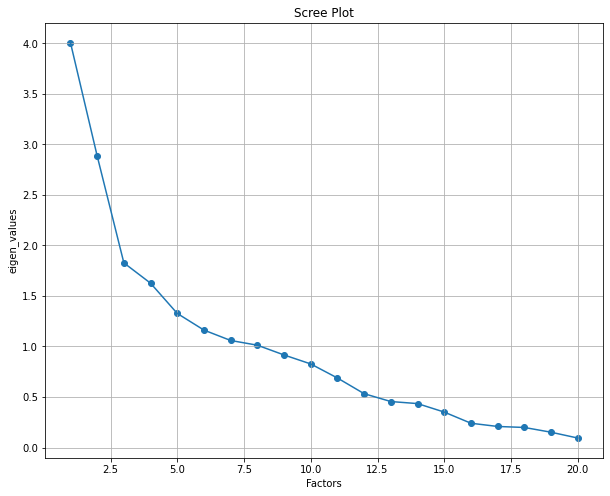

In [ ]:
# create a scree plot using matplotlib
plt.figure(figsize = (10, 8))
plt.scatter(range(1, data_FA.shape[1]+1), eigen_values)
plt.plot(range(1, data_FA.shape[1]+1), eigen_values)
plt.title("Scree Plot")
plt.xlabel('Factors')
plt.ylabel('eigen_values')
plt.grid()
plt.show()

In [ ]:
# performing factor analysis
fa = FactorAnalyzer(n_factors= 6,rotation= 'varimax')
fa.fit(data_FA)
fa.loadings_

array([[-0.22771498,  0.00372012,  0.80026308,  0.1140597 ,  0.00354802,
         0.05260336],
       [-0.08914828,  0.79908483, -0.05698905,  0.28192457,  0.47245736,
         0.06737395],
       [-0.00198984,  0.04993294,  0.00126657,  0.53498525, -0.08210575,
         0.03734056],
       [-0.05000158,  0.1981006 ,  0.05996163,  0.48786743,  0.20518986,
        -0.14116712],
       [-0.13277925,  0.01991552,  0.12063546,  0.79254807, -0.01470213,
         0.07004695],
       [ 0.01855862,  0.10002618, -0.0352243 ,  0.40648737,  0.08587304,
         0.04936634],
       [ 0.04095791, -0.27874514, -0.77251373, -0.13163821, -0.13381891,
        -0.00939182],
       [-0.07075007, -0.15221677,  0.49313029, -0.14634859, -0.10207265,
        -0.04455476],
       [-0.02261843, -0.05002635, -0.12117621,  0.19802412,  0.02988188,
         0.29039383],
       [ 0.55656879,  0.14259217,  0.06262474,  0.11485092,  0.30941413,
         0.48860355],
       [-0.10765986, -0.28239571, -0.02796569, -0.

In [ ]:
# create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(data_FA)
fa.loadings_

array([[ 0.02476312, -0.21914093,  0.81602095,  0.10842413, -0.05588563],
       [ 0.96379288, -0.08647978, -0.09050072,  0.25715971, -0.05792406],
       [ 0.00286127, -0.01321702, -0.00358847,  0.54859593, -0.05588904],
       [ 0.30195937, -0.039659  ,  0.0627728 ,  0.46838982,  0.17114559],
       [ 0.03347675, -0.12726745,  0.13057801,  0.79635995, -0.05687702],
       [ 0.14737727,  0.0284461 , -0.02991116,  0.39736096, -0.02718987],
       [-0.32329543,  0.04781928, -0.73612369, -0.12325946,  0.02359429],
       [-0.18154416, -0.0704926 ,  0.50156315, -0.14615537,  0.03872674],
       [-0.00700965,  0.00293738, -0.09873491,  0.18776183, -0.23741346],
       [ 0.30883558,  0.58572736,  0.07045386,  0.09081198, -0.3753371 ],
       [-0.2063389 , -0.10176551, -0.01125428, -0.10098878,  0.67952958],
       [ 0.05723557, -0.65696606,  0.15543784,  0.12096664,  0.2422739 ],
       [-0.17847119,  0.5515446 , -0.28034341, -0.04620674,  0.16673671],
       [ 0.01625637,  0.59563375,  0.0

In [ ]:
# get variance of each factor
fa.get_factor_variance()

(array([2.73090177, 2.24524717, 1.8181535 , 1.61233795, 0.84389339]),
 array([0.13654509, 0.11226236, 0.09090767, 0.0806169 , 0.04219467]),
 array([0.13654509, 0.24880745, 0.33971512, 0.42033202, 0.46252669]))